In [37]:
#import necessary library
import pandas as pd
import requests
import csv
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup #For data scrapping

# Data Exploration

In [38]:
#importing necessary library
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # Apply the default seaborn theme, scaling, and color palette

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [39]:
df = pd.read_csv("covid_update.csv")

In [40]:
df.head(10)

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\r\n1M pop\r\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl
0,NaN,\r\nNorth America\r\n,"3,249,522","+10,032","171,323",+894,"1,422,418","+4,219","1,655,781","19,003",NaN,NaN,NaN,NaN,NaN,North America,\r\n,NaN,NaN
1,NaN,\r\nSouth America\r\n,"2,303,508","+4,608","87,179",+190,"1,450,628","+90,851","765,701","12,892",NaN,NaN,NaN,NaN,NaN,South America,\r\n,NaN,NaN
2,NaN,\r\nEurope\r\n,"2,467,078","+10,355","192,369",+247,"1,396,762","+9,839","877,947","5,657",NaN,NaN,NaN,NaN,NaN,Europe,\r\n,NaN,NaN
3,NaN,\r\nAsia\r\n,"2,396,454","+28,068","58,501",+567,"1,586,382","+26,564","751,571","19,506",NaN,NaN,NaN,NaN,NaN,Asia,\r\n,NaN,NaN
4,NaN,\r\nAfrica\r\n,"422,343",+961,"10,451",+8,"201,701",+706,"210,191",916,NaN,NaN,NaN,NaN,NaN,Africa,\r\n,NaN,NaN
5,NaN,\r\nOceania\r\n,"9,643",+83,126,NaN,"8,687",+56,830,6,NaN,NaN,NaN,NaN,NaN,Australia/Oceania,\r\n,NaN,NaN
6,NaN,\r\n\r\n,721,NaN,15,NaN,651,NaN,55,4,NaN,NaN,NaN,NaN,NaN,NaN,\r\n,NaN,NaN
7,NaN,World,"10,849,269","+54,107","519,964","+1,906","6,067,229","+132,235","4,262,076","57,984","1,392",66.7,NaN,NaN,NaN,All,\r\n,NaN,NaN
8,1.0,USA,"2,782,346","+2,393","130,851",+53,"1,165,179",+499,"1,486,316","15,898","8,406",395,"34,892,789","105,414","331,007,570",North America,119,"2,530",9
9,2.0,Brazil,"1,456,969","+3,600","60,813",+100,"916,147","+89,281","480,009","8,318","6,854",286,"3,227,591","15,184","212,562,300",South America,146,"3,495",66


At first we need to name our features in a meaningful and authentic way. 

In [41]:
df.columns = ['#','Country','TotalCases','NewCases','TotalDeaths','NewDeaths','TotalRecovered','NewRecovered','ActiveCases','SeriousCritical','TotalCasesPerMillion','DeathsPerMillion','TotalTests','TestsPerMillion','Population','Continent','CaseEvery','DeathEvery','TestEvery']
df.head()

,#,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,SeriousCritical,TotalCasesPerMillion,DeathsPerMillion,TotalTests,TestsPerMillion,Population,Continent,CaseEvery,DeathEvery,TestEvery
0,NaN,\r\nNorth America\r\n,"3,249,522","+10,032","171,323",+894,"1,422,418","+4,219","1,655,781","19,003",NaN,NaN,NaN,NaN,NaN,North America,\r\n,NaN,NaN
1,NaN,\r\nSouth America\r\n,"2,303,508","+4,608","87,179",+190,"1,450,628","+90,851","765,701","12,892",NaN,NaN,NaN,NaN,NaN,South America,\r\n,NaN,NaN
2,NaN,\r\nEurope\r\n,"2,467,078","+10,355","192,369",+247,"1,396,762","+9,839","877,947","5,657",NaN,NaN,NaN,NaN,NaN,Europe,\r\n,NaN,NaN
3,NaN,\r\nAsia\r\n,"2,396,454","+28,068","58,501",+567,"1,586,382","+26,564","751,571","19,506",NaN,NaN,NaN,NaN,NaN,Asia,\r\n,NaN,NaN
4,NaN,\r\nAfrica\r\n,"422,343",+961,"10,451",+8,"201,701",+706,"210,191",916,NaN,NaN,NaN,NaN,NaN,Africa,\r\n,NaN,NaN


We've seen some columns are not that much rellivent. We'll reduce those columns

In [42]:
df = df.drop(['#','CaseEvery','DeathEvery','TestEvery'], axis=1)
df.head(10)

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,SeriousCritical,TotalCasesPerMillion,DeathsPerMillion,TotalTests,TestsPerMillion,Population,Continent
0,\r\nNorth America\r\n,"3,249,522","+10,032","171,323",+894,"1,422,418","+4,219","1,655,781","19,003",NaN,NaN,NaN,NaN,NaN,North America
1,\r\nSouth America\r\n,"2,303,508","+4,608","87,179",+190,"1,450,628","+90,851","765,701","12,892",NaN,NaN,NaN,NaN,NaN,South America
2,\r\nEurope\r\n,"2,467,078","+10,355","192,369",+247,"1,396,762","+9,839","877,947","5,657",NaN,NaN,NaN,NaN,NaN,Europe
3,\r\nAsia\r\n,"2,396,454","+28,068","58,501",+567,"1,586,382","+26,564","751,571","19,506",NaN,NaN,NaN,NaN,NaN,Asia
4,\r\nAfrica\r\n,"422,343",+961,"10,451",+8,"201,701",+706,"210,191",916,NaN,NaN,NaN,NaN,NaN,Africa
5,\r\nOceania\r\n,"9,643",+83,126,NaN,"8,687",+56,830,6,NaN,NaN,NaN,NaN,NaN,Australia/Oceania
6,\r\n\r\n,721,NaN,15,NaN,651,NaN,55,4,NaN,NaN,NaN,NaN,NaN,NaN
7,World,"10,849,269","+54,107","519,964","+1,906","6,067,229","+132,235","4,262,076","57,984","1,392",66.7,NaN,NaN,NaN,All
8,USA,"2,782,346","+2,393","130,851",+53,"1,165,179",+499,"1,486,316","15,898","8,406",395,"34,892,789","105,414","331,007,570",North America
9,Brazil,"1,456,969","+3,600","60,813",+100,"916,147","+89,281","480,009","8,318","6,854",286,"3,227,591","15,184","212,562,300",South America


The First 8 Rows data is continantal data. We will deal with only countries data. So We're going to delete first 8 row from this dataset. 

In [43]:
df = df.iloc[8:]
df.head()


,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,SeriousCritical,TotalCasesPerMillion,DeathsPerMillion,TotalTests,TestsPerMillion,Population,Continent
8,USA,"2,782,346","+2,393","130,851",+53,"1,165,179",+499,"1,486,316","15,898","8,406",395,"34,892,789","105,414","331,007,570",North America
9,Brazil,"1,456,969","+3,600","60,813",+100,"916,147","+89,281","480,009","8,318","6,854",286,"3,227,591","15,184","212,562,300",South America
10,Russia,"661,165","+6,760","9,683",+147,"428,978","+6,047","222,504","2,300","4,531",66,"20,168,904","138,205","145,934,790",Europe
11,India,"607,344","+2,124","17,873",+25,"361,108","+1,212","228,363","8,944",440,13,"9,056,173","6,562","1,380,011,546",Asia
12,UK,"313,483",NaN,"43,906",NaN,NaN,NaN,NaN,238,"4,618",647,"9,662,051","142,325","67,887,024",Europe


We can see the index start from 8. So we're going to reset the index number.

In [44]:
df = df.reset_index(drop=True)
df.head()

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,SeriousCritical,TotalCasesPerMillion,DeathsPerMillion,TotalTests,TestsPerMillion,Population,Continent
0,USA,"2,782,346","+2,393","130,851",+53,"1,165,179",+499,"1,486,316","15,898","8,406",395,"34,892,789","105,414","331,007,570",North America
1,Brazil,"1,456,969","+3,600","60,813",+100,"916,147","+89,281","480,009","8,318","6,854",286,"3,227,591","15,184","212,562,300",South America
2,Russia,"661,165","+6,760","9,683",+147,"428,978","+6,047","222,504","2,300","4,531",66,"20,168,904","138,205","145,934,790",Europe
3,India,"607,344","+2,124","17,873",+25,"361,108","+1,212","228,363","8,944",440,13,"9,056,173","6,562","1,380,011,546",Asia
4,UK,"313,483",NaN,"43,906",NaN,NaN,NaN,NaN,238,"4,618",647,"9,662,051","142,325","67,887,024",Europe


In [45]:
#Data discription
df.describe()

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,SeriousCritical,TotalCasesPerMillion,DeathsPerMillion,TotalTests,TestsPerMillion,Population,Continent
count,223,223,88,223,52,218,79,219,138,214,184,192,192,215,220
unique,216,215,71,142,30,203,67,177,77,200,97,192,192,214,7
top,Total:,103,+5,,+1,11,+23,0,1,20,3,"3,500,000","29,157",,Africa
freq,8,2,5,30,9,3,4,25,23,3,11,1,1,2,58


From this Description We got some interesting instinct. <br>
### 1: Tatal affected countries = 215 
### 2: Most affectected Continent = Africa
### 3: Total affect countries in Africa = 58

In [46]:
df.shape

(223, 15)

Total number of rows are 223

In [47]:
df.tail(10)

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,SeriousCritical,TotalCasesPerMillion,DeathsPerMillion,TotalTests,TestsPerMillion,Population,Continent
213,Saint Pierre Miquelon,1,NaN,,NaN,1,NaN,0,NaN,173,NaN,NaN,NaN,"5,794",North America
214,China,"83,537",+3,"4,634",NaN,"78,487",+8,416,7,58,3,"90,410,000","62,814","1,439,323,776",Asia
215,Total:,"3,249,522","+10,032","171,323",+894,"1,422,418","+4,219","1,655,781","19,003",NaN,NaN,NaN,NaN,NaN,North America
216,Total:,"2,303,508","+4,608","87,179",+190,"1,450,628","+90,851","765,701","12,892",NaN,NaN,NaN,NaN,NaN,South America
217,Total:,"2,467,078","+10,355","192,369",+247,"1,396,762","+9,839","877,947","5,657",NaN,NaN,NaN,NaN,NaN,Europe
218,Total:,"2,396,454","+28,068","58,501",+567,"1,586,382","+26,564","751,571","19,506",NaN,NaN,NaN,NaN,NaN,Asia
219,Total:,"422,343",+961,"10,451",+8,"201,701",+706,"210,191",916,NaN,NaN,NaN,NaN,NaN,Africa
220,Total:,"9,643",+83,126,NaN,"8,687",NaN,830,6,NaN,NaN,NaN,NaN,NaN,Australia/Oceania
221,Total:,721,NaN,15,NaN,651,NaN,55,4,NaN,NaN,NaN,NaN,NaN,NaN
222,Total:,"10,849,269","+54,107","519,964","+1,906","6,067,229","+132,235","4,262,076","57,984","1,391.9",66.7,NaN,NaN,NaN,All


In [48]:
df = df.drop(df.index[215:222])
df = df.reset_index(drop=True)
df.tail()

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,SeriousCritical,TotalCasesPerMillion,DeathsPerMillion,TotalTests,TestsPerMillion,Population,Continent
211,St. Barth,6,NaN,,NaN,6,NaN,0,NaN,607,NaN,152,"15,389","9,877",North America
212,Anguilla,3,NaN,,NaN,3,NaN,0,NaN,200,NaN,272,"18,130","15,003",North America
213,Saint Pierre Miquelon,1,NaN,,NaN,1,NaN,0,NaN,173,NaN,NaN,NaN,"5,794",North America
214,China,"83,537",+3,"4,634",NaN,"78,487",+8,416,7,58,3,"90,410,000","62,814","1,439,323,776",Asia
215,Total:,"10,849,269","+54,107","519,964","+1,906","6,067,229","+132,235","4,262,076","57,984","1,391.9",66.7,NaN,NaN,NaN,All


Deleted unnecessary rows.

In [49]:
df.replace(np.NaN, 'f', regex=True)
df.tail()

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,SeriousCritical,TotalCasesPerMillion,DeathsPerMillion,TotalTests,TestsPerMillion,Population,Continent
211,St. Barth,6,NaN,,NaN,6,NaN,0,NaN,607,NaN,152,"15,389","9,877",North America
212,Anguilla,3,NaN,,NaN,3,NaN,0,NaN,200,NaN,272,"18,130","15,003",North America
213,Saint Pierre Miquelon,1,NaN,,NaN,1,NaN,0,NaN,173,NaN,NaN,NaN,"5,794",North America
214,China,"83,537",+3,"4,634",NaN,"78,487",+8,416,7,58,3,"90,410,000","62,814","1,439,323,776",Asia
215,Total:,"10,849,269","+54,107","519,964","+1,906","6,067,229","+132,235","4,262,076","57,984","1,391.9",66.7,NaN,NaN,NaN,All


In [50]:
df.columns

Index(['Country', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths',
       'TotalRecovered', 'NewRecovered', 'ActiveCases', 'SeriousCritical',
       'TotalCasesPerMillion', 'DeathsPerMillion', 'TotalTests',
       'TestsPerMillion', 'Population', 'Continent'],
      dtype='object')

In [51]:
df.dtypes

Country                 object
TotalCases              object
NewCases                object
TotalDeaths             object
NewDeaths               object
TotalRecovered          object
NewRecovered            object
ActiveCases             object
SeriousCritical         object
TotalCasesPerMillion    object
DeathsPerMillion        object
TotalTests              object
TestsPerMillion         object
Population              object
Continent               object
dtype: object

In [52]:
df.isna().sum()

Country                   0
TotalCases                0
NewCases                134
TotalDeaths               0
NewDeaths               169
TotalRecovered            5
NewRecovered            142
ActiveCases               4
SeriousCritical          85
TotalCasesPerMillion      2
DeathsPerMillion         32
TotalTests               24
TestsPerMillion          24
Population                1
Continent                 2
dtype: int64

A lot of Null values are present here

In [53]:
df.head(5)

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,SeriousCritical,TotalCasesPerMillion,DeathsPerMillion,TotalTests,TestsPerMillion,Population,Continent
0,USA,"2,782,346","+2,393","130,851",+53,"1,165,179",+499,"1,486,316","15,898","8,406",395,"34,892,789","105,414","331,007,570",North America
1,Brazil,"1,456,969","+3,600","60,813",+100,"916,147","+89,281","480,009","8,318","6,854",286,"3,227,591","15,184","212,562,300",South America
2,Russia,"661,165","+6,760","9,683",+147,"428,978","+6,047","222,504","2,300","4,531",66,"20,168,904","138,205","145,934,790",Europe
3,India,"607,344","+2,124","17,873",+25,"361,108","+1,212","228,363","8,944",440,13,"9,056,173","6,562","1,380,011,546",Asia
4,UK,"313,483",NaN,"43,906",NaN,NaN,NaN,NaN,238,"4,618",647,"9,662,051","142,325","67,887,024",Europe


In [54]:
cols = []
for col in df.columns:
    cols.append(col)
cols.remove('Country')
cols.remove('Continent')
cols

['TotalCases',
 'NewCases',
 'TotalDeaths',
 'NewDeaths',
 'TotalRecovered',
 'NewRecovered',
 'ActiveCases',
 'SeriousCritical',
 'TotalCasesPerMillion',
 'DeathsPerMillion',
 'TotalTests',
 'TestsPerMillion',
 'Population']

In [55]:
# for col in cols:
#         for index, row in df.iterrows():
#         product = row['product']
#             value = row[col]
#             category = row['Continent']
#         if np.isnan(value):
#             category_mean = df.groupby('Continent')[col].mean()[category]
#             print(category_mean,col)
#             print(f'category_mean : {category_mean}')
#             df.loc[index, 'value'] = category_mean
#             df[col].fillna(category_mean,inplace=True)
#           else:
#             print(product, value, category)
#df[col].fillna(df.groupby('Continent')[col].mean()['Continent'],inplace=True)
#print(col, "-->", df.groupby('Continent')[col].mean())

Categorized the numerical columns to fill the null values of those columns by their median of their continent.

In [56]:
for col in cols:
    df[col] = df[col].str.replace(',','')
    df[col] = df[col].str.replace('+','')
    df[col] = df[col].str.replace(" ",'')
    df[col] = pd.to_numeric(df[col])
    df[col] = df[col].fillna(df.groupby('Continent')[col].transform('median'))

df.isna().sum()

Country                 0
TotalCases              0
NewCases                2
TotalDeaths             0
NewDeaths               8
TotalRecovered          1
NewRecovered            2
ActiveCases             0
SeriousCritical         1
TotalCasesPerMillion    2
DeathsPerMillion        2
TotalTests              3
TestsPerMillion         3
Population              3
Continent               2
dtype: int64

Still we have some null values as the some of the contitnents such as Australia or NaN hasn't updated the data of that day. So it couldn't find the data to measure the mean of that continent.

In [57]:
df.tail(20)

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,SeriousCritical,TotalCasesPerMillion,DeathsPerMillion,TotalTests,TestsPerMillion,Population,Continent
196,New Caledonia,21,41.5,63.0,NaN,21.0,28.0,0.0,3.0,74.0,4.0,8406.0,29443.0,2.855000e+05,Australia/Oceania
197,Laos,19,217.5,154.5,4.0,19.0,224.5,0.0,19.0,3.0,10.5,16147.0,2219.0,7.275362e+06,Asia
198,Saint Lucia,19,484.0,14.0,44.5,19.0,63.0,0.0,5.0,103.0,33.0,1667.0,9078.0,1.836300e+05,North America
199,Dominica,18,484.0,14.0,44.5,18.0,63.0,0.0,5.0,250.0,33.0,623.0,8654.0,7.198700e+04,North America
200,Fiji,18,41.5,63.0,NaN,18.0,28.0,0.0,3.0,20.0,4.0,4000.0,4462.0,8.964570e+05,Australia/Oceania
201,Saint Kitts and Nevis,15,484.0,14.0,44.5,15.0,63.0,0.0,5.0,282.0,33.0,454.0,8534.0,5.320000e+04,North America
202,Falkland Islands,13,2304.0,1201.0,78.0,13.0,1146.0,0.0,71.0,3737.0,54.0,1197.0,344064.0,3.479000e+03,South America
203,Greenland,13,484.0,14.0,44.5,13.0,63.0,0.0,5.0,229.0,33.0,3839.0,67624.0,5.677000e+04,North America
204,Vatican City,12,81.0,321.0,7.0,12.0,76.0,0.0,30.0,14981.0,66.0,279690.0,69223.0,8.010000e+02,Europe
205,Montserrat,11,484.0,1.0,44.5,10.0,63.0,0.0,5.0,2204.0,200.0,61.0,12220.0,4.992000e+03,North America


In [58]:
df.groupby('Continent')['TotalCases','Country'].mean()

,TotalCases
Continent,
Africa,7.409526e+03
All,1.084927e+07
Asia,4.890722e+04
Australia/Oceania,1.607167e+03
Europe,5.139746e+04
North America,8.332108e+04
South America,1.645363e+05


Null values are fixed. But **Continent** column has 2 null values.

In [59]:
print(df[df["Continent"].isnull()]['Country'])

142    Diamond Princess
208          MS Zaandam
Name: Country, dtype: object


These are not under any Continent. Found out these are ships. 

In [60]:
df.dtypes

Country                  object
TotalCases                int64
NewCases                float64
TotalDeaths             float64
NewDeaths               float64
TotalRecovered          float64
NewRecovered            float64
ActiveCases             float64
SeriousCritical         float64
TotalCasesPerMillion    float64
DeathsPerMillion        float64
TotalTests              float64
TestsPerMillion         float64
Population              float64
Continent                object
dtype: object

After fixing the null values we have got the columns as desired data data type.

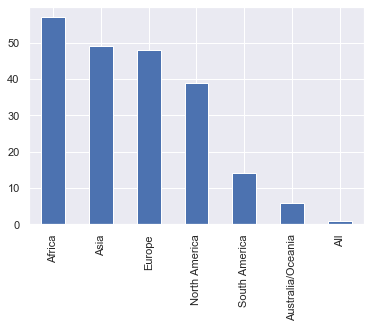

In [61]:
plot = df["Continent"].value_counts().plot(kind="bar")

**Africa** has the most countries infected with this virus.

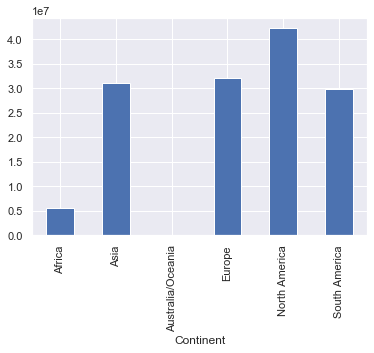

In [62]:
TCC = df.melt(['TotalCases','Continent']).groupby('Continent').TotalCases.sum().drop('All').plot(kind='bar')

But from here we can see that although countries of **Africa** are most infected but most cases are in **North America**. And **Australia** is in the safest pposition.

In [63]:
idx = df.groupby(['Continent'])['TotalCases'].transform(max) == df['TotalCases']
df[idx]

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,SeriousCritical,TotalCasesPerMillion,DeathsPerMillion,TotalTests,TestsPerMillion,Population,Continent
0,USA,2782346,2393.0,130851.0,53.0,1165179.0,499.0,1486316.0,15898.0,8406.0,395.0,34892789.0,105414.0,3.310076e+08,North America
1,Brazil,1456969,3600.0,60813.0,100.0,916147.0,89281.0,480009.0,8318.0,6854.0,286.0,3227591.0,15184.0,2.125623e+08,South America
2,Russia,661165,6760.0,9683.0,147.0,428978.0,6047.0,222504.0,2300.0,4531.0,66.0,20168904.0,138205.0,1.459348e+08,Europe
3,India,607344,2124.0,17873.0,25.0,361108.0,1212.0,228363.0,8944.0,440.0,13.0,9056173.0,6562.0,1.380012e+09,Asia
16,South Africa,159333,55.0,2749.0,2.0,76025.0,17.0,80559.0,539.0,2687.0,46.0,1666939.0,28106.0,5.930802e+07,Africa
70,Australia,8001,81.0,104.0,NaN,7090.0,50.0,807.0,5.0,314.0,4.0,2561143.0,100438.0,2.549977e+07,Australia/Oceania
215,Total:,10849269,54107.0,519964.0,1906.0,6067229.0,132235.0,4262076.0,57984.0,1391.9,66.7,NaN,NaN,NaN,All


From here we can see which countries of the continents has the highest number of total infected cases. 

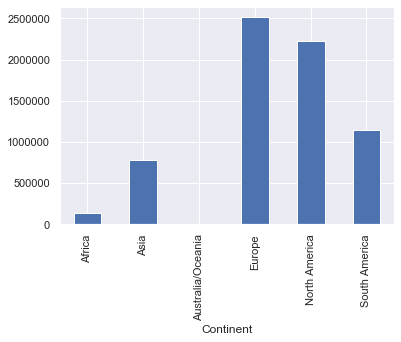

In [64]:
TD = df.melt(['TotalDeaths','Continent']).groupby('Continent').TotalDeaths.sum().drop('All').plot(kind='bar')

Maximum deaths are in the North America Continent and minimum in the Africa. From here I have an assumption that people of poorer countries have better immune system, or there isn't enough good reporting, must have missed actual death reports.

In [65]:
idx = df.groupby(['Continent'])['TotalDeaths'].transform(max) == df['TotalDeaths']
df[idx]

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,SeriousCritical,TotalCasesPerMillion,DeathsPerMillion,TotalTests,TestsPerMillion,Population,Continent
0,USA,2782346,2393.0,130851.0,53.0,1165179.0,499.0,1486316.0,15898.0,8406.0,395.0,34892789.0,105414.0,3.310076e+08,North America
1,Brazil,1456969,3600.0,60813.0,100.0,916147.0,89281.0,480009.0,8318.0,6854.0,286.0,3227591.0,15184.0,2.125623e+08,South America
3,India,607344,2124.0,17873.0,25.0,361108.0,1212.0,228363.0,8944.0,440.0,13.0,9056173.0,6562.0,1.380012e+09,Asia
4,UK,313483,81.0,43906.0,7.0,2721.5,76.0,580.0,238.0,4618.0,647.0,9662051.0,142325.0,6.788702e+07,Europe
21,Egypt,69814,55.0,3034.0,2.0,18881.0,17.0,47899.0,41.0,682.0,30.0,135000.0,1319.0,1.023264e+08,Africa
70,Australia,8001,81.0,104.0,NaN,7090.0,50.0,807.0,5.0,314.0,4.0,2561143.0,100438.0,2.549977e+07,Australia/Oceania
215,Total:,10849269,54107.0,519964.0,1906.0,6067229.0,132235.0,4262076.0,57984.0,1391.9,66.7,NaN,NaN,NaN,All


USA is highest with the number of deaths in North America continent as well as among all the countries in the world. India has the first position in Asia.

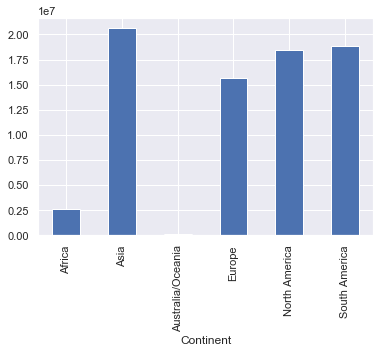

In [66]:
TR = df.melt(['TotalRecovered','Continent']).groupby('Continent').TotalRecovered.sum().drop('All').plot(kind='bar')

In terms of total recovery Asia is in the top position! It seems like people of Asia continent has better immune system than others.

In [67]:
idx = df.groupby(['Continent'])['TotalDeaths'].transform(max) == df['TotalDeaths']
df[idx]

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,SeriousCritical,TotalCasesPerMillion,DeathsPerMillion,TotalTests,TestsPerMillion,Population,Continent
0,USA,2782346,2393.0,130851.0,53.0,1165179.0,499.0,1486316.0,15898.0,8406.0,395.0,34892789.0,105414.0,3.310076e+08,North America
1,Brazil,1456969,3600.0,60813.0,100.0,916147.0,89281.0,480009.0,8318.0,6854.0,286.0,3227591.0,15184.0,2.125623e+08,South America
3,India,607344,2124.0,17873.0,25.0,361108.0,1212.0,228363.0,8944.0,440.0,13.0,9056173.0,6562.0,1.380012e+09,Asia
4,UK,313483,81.0,43906.0,7.0,2721.5,76.0,580.0,238.0,4618.0,647.0,9662051.0,142325.0,6.788702e+07,Europe
21,Egypt,69814,55.0,3034.0,2.0,18881.0,17.0,47899.0,41.0,682.0,30.0,135000.0,1319.0,1.023264e+08,Africa
70,Australia,8001,81.0,104.0,NaN,7090.0,50.0,807.0,5.0,314.0,4.0,2561143.0,100438.0,2.549977e+07,Australia/Oceania
215,Total:,10849269,54107.0,519964.0,1906.0,6067229.0,132235.0,4262076.0,57984.0,1391.9,66.7,NaN,NaN,NaN,All


USA has the highest number of recovery in NA as well as around the world. India has got the top position in terms of recovery in Asia.

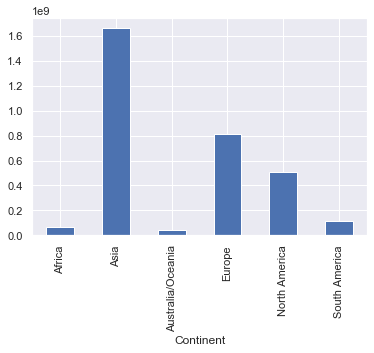

In [68]:
TT = df.melt(['TotalTests','Continent']).groupby('Continent').TotalTests.sum().drop('All').plot(kind='bar')

In terms of tests Asia is in the top position. Australia is the lowest but that's okay because they are also less indected. But The number of tests in Africa and South America shows that the economic situation is not in control their. Also they are not getting enough help. Africa has the most number infected countries and South America has a good portion of deaths and infection number. But according to that their number of tests are very less. 

In [69]:
idx = df.groupby(['Continent'])['TotalTests'].transform(max) == df['TotalTests']
df[idx]

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,SeriousCritical,TotalCasesPerMillion,DeathsPerMillion,TotalTests,TestsPerMillion,Population,Continent
0,USA,2782346,2393.0,130851.0,53.0,1165179.0,499.0,1486316.0,15898.0,8406.0,395.0,34892789.0,105414.0,3.310076e+08,North America
1,Brazil,1456969,3600.0,60813.0,100.0,916147.0,89281.0,480009.0,8318.0,6854.0,286.0,3227591.0,15184.0,2.125623e+08,South America
2,Russia,661165,6760.0,9683.0,147.0,428978.0,6047.0,222504.0,2300.0,4531.0,66.0,20168904.0,138205.0,1.459348e+08,Europe
16,South Africa,159333,55.0,2749.0,2.0,76025.0,17.0,80559.0,539.0,2687.0,46.0,1666939.0,28106.0,5.930802e+07,Africa
70,Australia,8001,81.0,104.0,NaN,7090.0,50.0,807.0,5.0,314.0,4.0,2561143.0,100438.0,2.549977e+07,Australia/Oceania
214,China,83537,3.0,4634.0,4.0,78487.0,8.0,416.0,7.0,58.0,3.0,90410000.0,62814.0,1.439324e+09,Asia


China has got the highest number of tests among all countries. Although Brazil has a lot of infected cases and deaths but their number of tests are very less. It shows that Brazil is now in a very critical position.

In [70]:
idx = df.groupby(['Continent'])['TestsPerMillion'].transform(min) == df['TestsPerMillion']
df[idx]

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,SeriousCritical,TotalCasesPerMillion,DeathsPerMillion,TotalTests,TestsPerMillion,Population,Continent
66,Sudan,9573,55.0,602.0,2.0,4606.0,17.0,4365.0,6.5,218.0,14.0,401.0,9.0,43842566.0,Africa
80,Haiti,6040,65.0,107.0,2.0,1032.0,101.0,4901.0,5.0,530.0,9.0,12241.0,1074.0,11402434.0,North America
98,Albania,2662,82.0,69.0,4.0,1559.0,43.0,1034.0,10.0,925.0,24.0,24237.0,8422.0,2877778.0,Europe
124,Yemen,1190,217.5,318.0,4.0,504.0,224.5,368.0,19.0,40.0,11.0,120.0,4.0,29822135.0,Asia
150,Suriname,535,2304.0,13.0,78.0,242.0,1146.0,280.0,8.0,912.0,22.0,1244.0,2121.0,586637.0,South America
206,Papua New Guinea,11,41.5,63.0,NaN,8.0,28.0,3.0,3.0,1.0,4.0,7147.0,799.0,8946313.0,Australia/Oceania


Here we can see that the situation in sudan is very unwell. Per million they have done only 9 tests! that's not a good sign. It shows why Africa is in danger postion. The almighty Allah helping them now only. In Asia Yemen is has the lowest number of tests per million. This country wasn't in a good position and the situation there got worsen. 

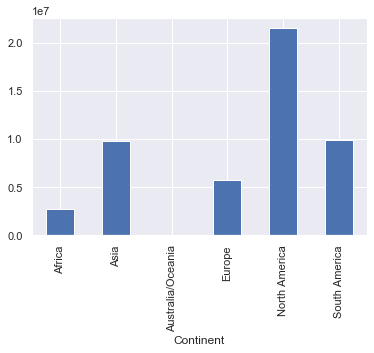

In [71]:
TAC = df.melt(['ActiveCases','Continent']).groupby('Continent').ActiveCases.sum().drop('All').plot(kind='bar')

So NA has the most active cases and Africa has the lowest. Austrlia's data are missing as it's not updated.

In [73]:
idx = df.groupby(['Continent'])['ActiveCases'].transform(max) == df['ActiveCases']
df[idx]

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,SeriousCritical,TotalCasesPerMillion,DeathsPerMillion,TotalTests,TestsPerMillion,Population,Continent
0,USA,2782346,2393.0,130851.0,53.0,1165179.0,499.0,1486316.0,15898.0,8406.0,395.0,34892789.0,105414.0,3.310076e+08,North America
1,Brazil,1456969,3600.0,60813.0,100.0,916147.0,89281.0,480009.0,8318.0,6854.0,286.0,3227591.0,15184.0,2.125623e+08,South America
2,Russia,661165,6760.0,9683.0,147.0,428978.0,6047.0,222504.0,2300.0,4531.0,66.0,20168904.0,138205.0,1.459348e+08,Europe
3,India,607344,2124.0,17873.0,25.0,361108.0,1212.0,228363.0,8944.0,440.0,13.0,9056173.0,6562.0,1.380012e+09,Asia
16,South Africa,159333,55.0,2749.0,2.0,76025.0,17.0,80559.0,539.0,2687.0,46.0,1666939.0,28106.0,5.930802e+07,Africa
70,Australia,8001,81.0,104.0,NaN,7090.0,50.0,807.0,5.0,314.0,4.0,2561143.0,100438.0,2.549977e+07,Australia/Oceania
215,Total:,10849269,54107.0,519964.0,1906.0,6067229.0,132235.0,4262076.0,57984.0,1391.9,66.7,NaN,NaN,NaN,All


So from this we can say that USA,Brazil and India are currently hot zone for covid-19.